**Introduction**


This project examines various global health, population, and vaccination trends by analyzing data from multiple sources. It combines information on COVID-19 vaccination rates, population statistics, and life expectancy to explore how these factors are connected. The datasets cover over 200 countries and provide insights into vaccination progress, COVID-19 cases and deaths, population growth, and density.

The project includes steps like data cleaning, transformation, and aggregation to generate clear visualizations that reveal important trends. For example, it looks at how life expectancy relates to COVID-19 data and compares vaccination rates with population figures. Using scatter plots, line charts, and pivot tables, the project offers a thorough look at global health patterns, focusing on the effects of COVID-19 and vaccination efforts across countries.






https://ourworldindata.org/covid-vaccinations: CSV Format

* COVID-19 Vaccinations Dataset: This dataset, available at World in Data: COVID Vaccinations, provides global statistics on the COVID-19 vaccination process. It contains data about the total number of vaccinations administered across countries, the percentage of the population vaccinated, new vaccinations by day, and the rate of vaccination over time. This dataset allows the analysis of global vaccination trends and the comparison of vaccination efforts between countries.



https://www.kaggle.com/datasets/dataanalyst001/world-population-by-country-2024: CSV Format

* World Population Dataset: The dataset from Kaggle: World Population by Country 2024 contains population data for each country, projected for the year 2024. It includes population figures, population growth rates, densities, and other key statistics for over 230 countries. This data is useful for understanding how population dynamics are related to various health indicators, including COVID-19 cases, deaths, and vaccination efforts.

https://ourworldindata.org/health-meta: Excel Workbook

* Health Meta Dataset: The third dataset is from World in Data: Health Meta, which provides a collection of health-related statistics for various countries. It includes data on life expectancy, infant mortality, and other key health metrics. This dataset helps analyze how different health factors, such as life expectancy, relate to the prevalence and impact of COVID-19 across the globe.

# **Import datasets**

In [6]:
# Importing pandas library
import pandas as pd

In [7]:
# Reading the covid vaccination dataset
covid_vaccination = pd.read_csv("covid vaccination.csv")

In [8]:
# Reading the World Population by country 2024 dataset
World_population = pd.read_csv("World Population by country 2024.csv")

In [9]:
# Reading the Life-Expectancy dataset
Life_Expectancy = pd.read_excel("Life-Excpectancy.xlsx")

# **Data transformations**

**Dataset 1**

In [10]:
# Preview the covid vaccination dataset
covid_vaccination

,country,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,total_tests,new_tests,total_vaccinations,new_vaccinations,continent
0,Afghanistan,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,1/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
2,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
3,Afghanistan,1/4/2020,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Asia
4,Afghanistan,1/5/2020,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
458543,Zimbabwe,11/20/2024,266396.0,0.0,5740.0,0.0,NaN,NaN,NaN,NaN,NaN,Africa
458544,Zimbabwe,11/21/2024,266396.0,0.0,5740.0,0.0,NaN,NaN,NaN,NaN,NaN,Africa
458545,Zimbabwe,11/22/2024,266396.0,0.0,5740.0,0.0,NaN,NaN,NaN,NaN,NaN,Africa
458546,Zimbabwe,11/23/2024,266396.0,0.0,5740.0,0.0,NaN,NaN,NaN,NaN,NaN,Africa


In [11]:
# Fill all null values with 0 value

covid_vaccination.fillna(0, inplace=True)

In [12]:
# Overview of the covid vaccination dataset (data types, missing values)
covid_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458548 entries, 0 to 458547
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   country             458548 non-null  object 
 1   date                458548 non-null  object 
 2   total_cases         458548 non-null  float64
 3   new_cases           458548 non-null  float64
 4   total_deaths        458548 non-null  float64
 5   new_deaths          458548 non-null  float64
 6   hosp_patients       458548 non-null  float64
 7   total_tests         458548 non-null  float64
 8   new_tests           458548 non-null  float64
 9   total_vaccinations  458548 non-null  float64
 10  new_vaccinations    458548 non-null  float64
 11  continent           458548 non-null  object 
dtypes: float64(9), object(3)
memory usage: 42.0+ MB


In [13]:
# Converting 'country' to string (if not already)
covid_vaccination['country'] = covid_vaccination['country'].astype('string')

# Converting 'date' to datetime with automatic format inference
covid_vaccination['date'] = pd.to_datetime(covid_vaccination['date'], errors='coerce')

In [14]:
# Converting 'continent' to string
covid_vaccination['continent'] = covid_vaccination['continent'].astype('string')

**Dataset 2**

In [15]:
# Preview the world population dataset
World_population.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [16]:
# Overview of the world population dataset (data types, missing values)

World_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
 7   World Rank       234 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.8+ KB


In [17]:
# Converting the 'Country' column to string
World_population['Country'] = World_population['Country'].astype('string')

# Converting 'Area (km2)' to float
World_population['Area (km2)'] = World_population['Area (km2)'].astype('string')

In [18]:
# Creating a column that represents the change in population from 2023 to 2024

World_population['Population Change'] = World_population['Population 2024'] - World_population['Population 2023']

In [19]:
# Calculating the growth rate based on population from 2023 to 2024

World_population['Growth Rate (2023 to 2024)'] = ((World_population['Population 2024'] - World_population['Population 2023']) / World_population['Population 2023']) * 100

**Dataset 3**

In [20]:
# Overview of the Life Expectancy dataset (data types, missing values)

Life_Expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21565 entries, 0 to 21564
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entity                                                 21565 non-null  object 
 1   Code                                                   19609 non-null  object 
 2   Year                                                   21565 non-null  int64  
 3   Period life expectancy at birth - Sex: total - Age: 0  21565 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 674.0+ KB


In [21]:
# Filtering the latest year for each country
latest_life_expectancy = Life_Expectancy.loc[Life_Expectancy.groupby('Entity')['Year'].idxmax()]

# Removing the 'Year' column
Life_Expectancy = latest_life_expectancy.drop(columns='Year')

In [22]:
# Preview the Life Expectancy dataset

Life_Expectancy.head().reset_index(drop=True)

,Entity,Code,Period life expectancy at birth - Sex: total - Age: 0
0,Afghanistan,AFG,66.0346
1,Africa,NaN,63.8428
2,Albania,ALB,79.6019
3,Algeria,DZA,76.2610
4,American Samoa,ASM,72.8518


In [23]:
# Rename the column into Life expectancy (Years)

Life_Expectancy.rename(columns={'Period life expectancy at birth - Sex: total - Age: 0': 'Life expectancy (Years)'}, inplace=True)

In [24]:
# Rename the column entity to country

Life_Expectancy.rename(columns={'Entity': 'country'}, inplace=True)

In [25]:
# Converting Entity and code to String

Life_Expectancy['Code'] = Life_Expectancy['Code'].astype('string')
Life_Expectancy['country'] = Life_Expectancy['country'].astype('string')

# **Data merging**

Data merging 1: Merge covid_vaccination and World_population dataframes

In [26]:
# Calculating total cases
covid_vaccination_to_merge = covid_vaccination.groupby('country')[['new_cases','new_deaths', 'new_vaccinations']].sum()

covid_vaccination_to_merge = covid_vaccination_to_merge.rename(columns={'new_cases': 'Total_cases', 'new_deaths': 'Total_deaths', 'new_vaccinations': 'Total_vaccinations'})

# Rename 'Country' in World_population to 'country' to match covid_vaccination
World_population.rename(columns={'Country': 'country'}, inplace=True)

# Find the common countries between both datasets
common_countries = set(covid_vaccination_to_merge.index) & set(World_population['country'])

# Filtering both dataframes to keep only common countries
covid_vaccination_to_merge = covid_vaccination_to_merge[covid_vaccination_to_merge.index.isin(common_countries)]
World_population = World_population[World_population['country'].isin(common_countries)]

# Merging the two dataframes on the 'country' column
Covid_Vaccination_Population = pd.merge(covid_vaccination_to_merge, World_population, on='country', how='left')

# Display the result
Covid_Vaccination_Population.head()


,country,Total_cases,Total_deaths,Total_vaccinations,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank,Population Change,Growth Rate (2023 to 2024)
0,Afghanistan,235214.0,7998.0,78275.0,43372950,42239854,652.2K,66.0,0.0268,0.0054,36,1133096,2.682528
1,Albania,337196.0,3608.0,1417691.0,2826020,2832439,27.4K,103.0,-0.0023,0.0004,139,-6419,-0.226624
2,Algeria,272175.0,6881.0,170786.0,46278751,45606480,2.4M,19.0,0.0147,0.0058,34,672271,1.474069
3,American Samoa,8359.0,34.0,0.0,43544,43914,200,218.0,-0.0084,0.0000,214,-370,-0.842556
4,Andorra,48015.0,159.0,4802.0,80341,80088,470,171.0,0.0032,0.0000,203,253,0.315903


In [27]:
# Display the result
Covid_Vaccination_Population.head()

,country,Total_cases,Total_deaths,Total_vaccinations,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank,Population Change,Growth Rate (2023 to 2024)
0,Afghanistan,235214.0,7998.0,78275.0,43372950,42239854,652.2K,66.0,0.0268,0.0054,36,1133096,2.682528
1,Albania,337196.0,3608.0,1417691.0,2826020,2832439,27.4K,103.0,-0.0023,0.0004,139,-6419,-0.226624
2,Algeria,272175.0,6881.0,170786.0,46278751,45606480,2.4M,19.0,0.0147,0.0058,34,672271,1.474069
3,American Samoa,8359.0,34.0,0.0,43544,43914,200,218.0,-0.0084,0.0000,214,-370,-0.842556
4,Andorra,48015.0,159.0,4802.0,80341,80088,470,171.0,0.0032,0.0000,203,253,0.315903


Data merging 2: Merge Life_expectancy and World population

In [28]:
# Merging the two dataframes on the 'country' column

Population_and_Life_expectancy = pd.merge(World_population, Life_Expectancy , on='country', how='left')

Data merging 3: Merge all 3 datasets

In [29]:
# Merging all 3 datasets

All_data = pd.merge(Covid_Vaccination_Population, Life_Expectancy, on='country', how='left')

# Preview the merged dataset
All_data.head()

,country,Total_cases,Total_deaths,Total_vaccinations,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank,Population Change,Growth Rate (2023 to 2024),Code,Life expectancy (Years)
0,Afghanistan,235214.0,7998.0,78275.0,43372950,42239854,652.2K,66.0,0.0268,0.0054,36,1133096,2.682528,AFG,66.0346
1,Albania,337196.0,3608.0,1417691.0,2826020,2832439,27.4K,103.0,-0.0023,0.0004,139,-6419,-0.226624,ALB,79.6019
2,Algeria,272175.0,6881.0,170786.0,46278751,45606480,2.4M,19.0,0.0147,0.0058,34,672271,1.474069,DZA,76.2610
3,American Samoa,8359.0,34.0,0.0,43544,43914,200,218.0,-0.0084,0.0000,214,-370,-0.842556,ASM,72.8518
4,Andorra,48015.0,159.0,4802.0,80341,80088,470,171.0,0.0032,0.0000,203,253,0.315903,AND,84.0406


# **Data Pivoting**

In [30]:
# Creating a pivot table to get total cases by country
pivot_total_cases = covid_vaccination.pivot_table(index='country', values='new_cases', aggfunc='sum')

 # Preview the total cases pivot table
pivot_total_cases.head()

,new_cases
country,
Afghanistan,235214.0
Africa,13148791.0
Albania,337196.0
Algeria,272175.0
American Samoa,8359.0


In [31]:
# Creating a pivot table to get total vaccinations by country
pivot_vaccination = covid_vaccination.pivot_table(index='country', values='new_vaccinations', aggfunc='sum')

# Preview the total vaccinations pivot table
pivot_vaccination.head()

,new_vaccinations
country,
Afghanistan,7.827500e+04
Africa,8.739327e+08
Albania,1.417691e+06
Algeria,1.707860e+05
American Samoa,0.000000e+00


In [32]:
# Creating a pivot table to get total deaths by country
pivot_deaths= covid_vaccination.pivot_table(index='country', values='new_deaths', aggfunc='sum')

# Preview the total deaths pivot table
pivot_deaths.head()

,new_deaths
country,
Afghanistan,7998.0
Africa,259130.0
Albania,3608.0
Algeria,6881.0
American Samoa,34.0


# **Data Visualizations**

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

**Visualization 1: Total cases vs Total Deaths**

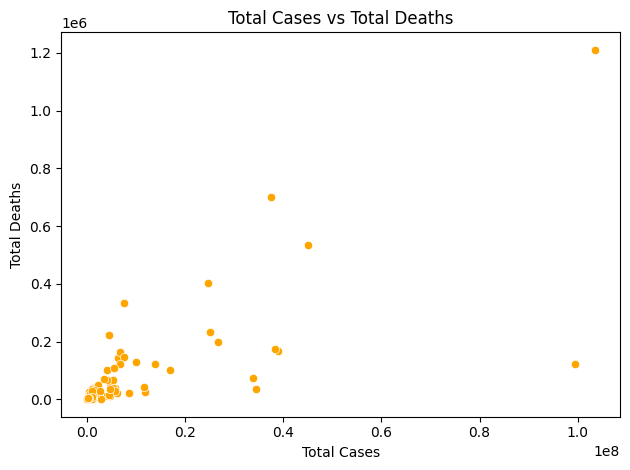

In [34]:
# Plot 1: Total cases vs Total deaths (scatter plot)
sns.scatterplot(x='Total_cases', y='Total_deaths', data=Covid_Vaccination_Population, color='orange')
plt.title('Total Cases vs Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()

Interpretation: The scatter plot above shows how Total Cases and Total Deaths are related across different countries. We can see a positive correlation, meaning that countries with more COVID-19 cases usually have higher death rates. However, there are a few outliers where some countries have very high death tolls despite having fewer cases, which could be due to factors like population density, the quality of healthcare systems, or differences in how deaths are reported. This visualization provides valuable insights into how the pandemic has affected countries in different ways.

**Visualization 2: Top 10 vountries in vaccinations**

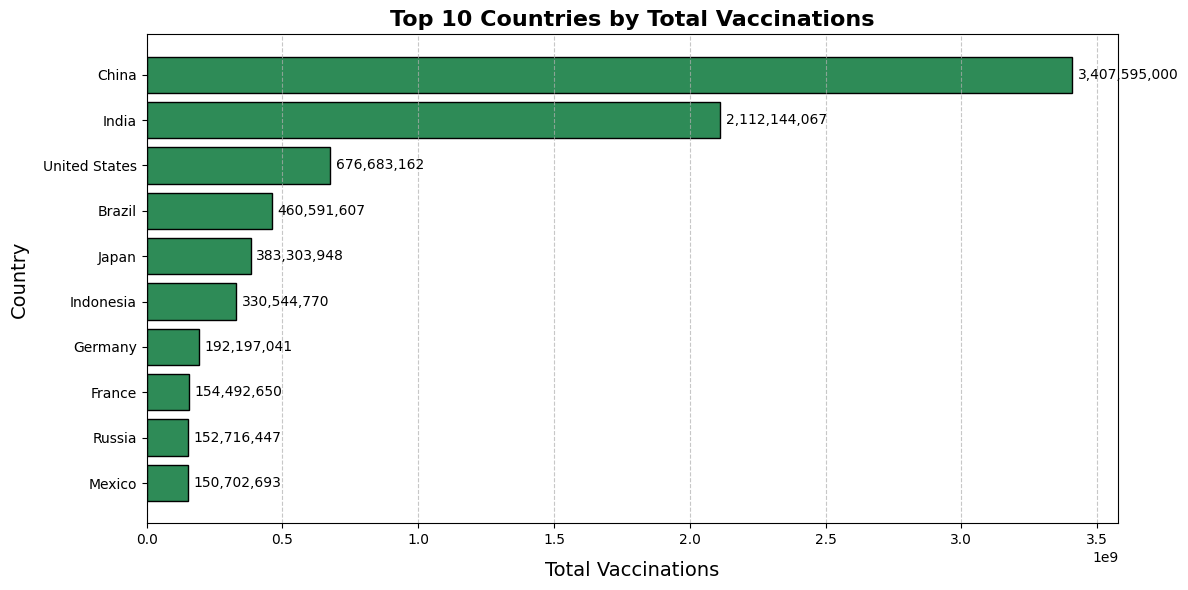

In [35]:
import matplotlib.pyplot as plt

# Top 10 countries based on total vaccinations
top_10_vaccinated = Covid_Vaccination_Population.sort_values(by='Total_vaccinations', ascending=False).head(10)

# Plot the top 10 countries based on Total Vaccinations
plt.figure(figsize=(12, 6))

# Create horizontal bar chart with enhanced colors and labels
bars = plt.barh(top_10_vaccinated['country'], top_10_vaccinated['Total_vaccinations'], color='seagreen', edgecolor='black')

# Adding a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add titles and labels
plt.xlabel('Total Vaccinations', fontsize=14, labelpad=10)
plt.ylabel('Country', fontsize=14, labelpad=10)
plt.title('Top 10 Countries by Total Vaccinations', fontsize=16, fontweight='bold')

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

# Annotate values on top of bars for clarity
for bar in bars:
    plt.text(bar.get_width() + 2e7, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', va='center', fontsize=10)

# Tweak layout to ensure labels fit well
plt.tight_layout()

# Show the plot
plt.show()


Interpretation: The bar chart shows the top 10 countries by total vaccinations. China leads by a significant margin, followed by India and the United States, which have also administered large numbers of vaccinations. Other countries like Brazil, Japan, and Indonesia follow, with lower numbers compared to the top three. This indicates that vaccination efforts in the most populous countries have been the largest, while other nations have administered comparatively fewer vaccines.








**Visualization 3: Total vaccinations vs Population (scatter plot)**

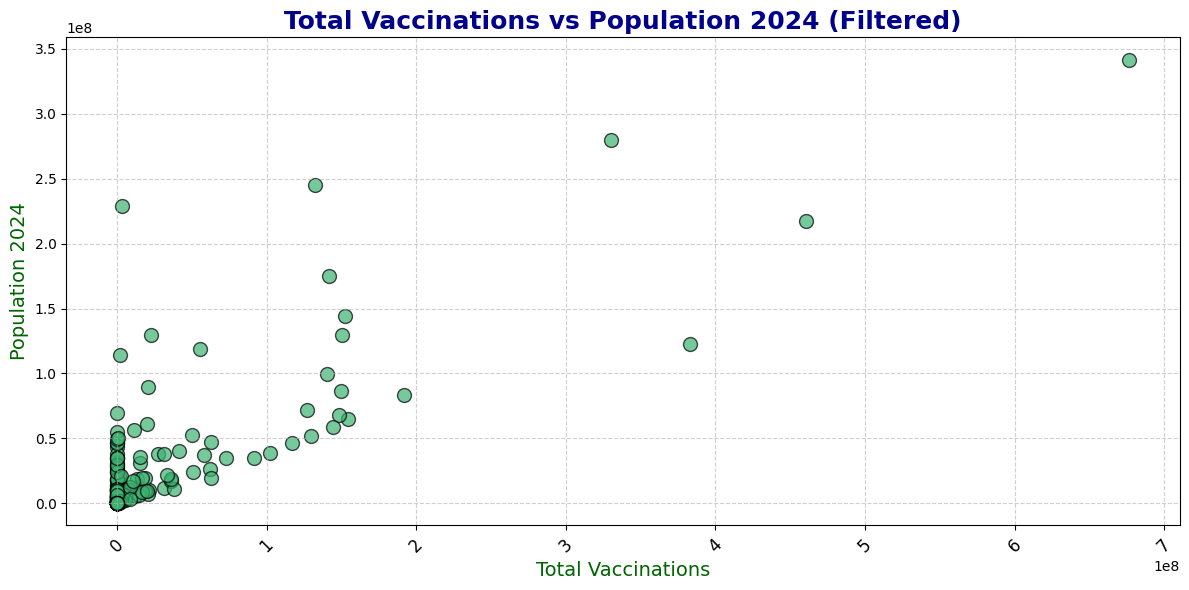

In [36]:
import matplotlib.pyplot as plt

# Set a threshold to limit the outliers
vaccination_threshold = 2e9

# Filter data to remove outliers
filtered_data = Covid_Vaccination_Population[Covid_Vaccination_Population['Total_vaccinations'] < vaccination_threshold]

plt.figure(figsize=(12, 6))

# Plot Total Vaccinations vs Population 2024 with a beautiful color and styling
plt.scatter(filtered_data['Total_vaccinations'], filtered_data['Population 2024'], color='mediumseagreen',
            alpha=0.7, edgecolors='black', s=100)

# Adding titles and labels with enhanced styling
plt.title('Total Vaccinations vs Population 2024 (Filtered)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Total Vaccinations', fontsize=14, color='darkgreen')
plt.ylabel('Population 2024', fontsize=14, color='darkgreen')

# Set gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a slight rotation to x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)

# Show the plot with tight layout to avoid clipping
plt.tight_layout()
plt.show()


Interpretation: The scatter plot "Total Vaccinations vs Population 2024 (Filtered)" shows the relationship between total vaccinations and the projected population for 2024. Most countries are concentrated in the lower-left corner, indicating lower vaccination rates relative to their population. A few outliers on the upper-right show countries with significantly higher vaccination rates. This visualization highlights the disparity in vaccination efforts across different nations.

**Visualization 4:Top 10 Countries by Total Cases vs Total Deaths**

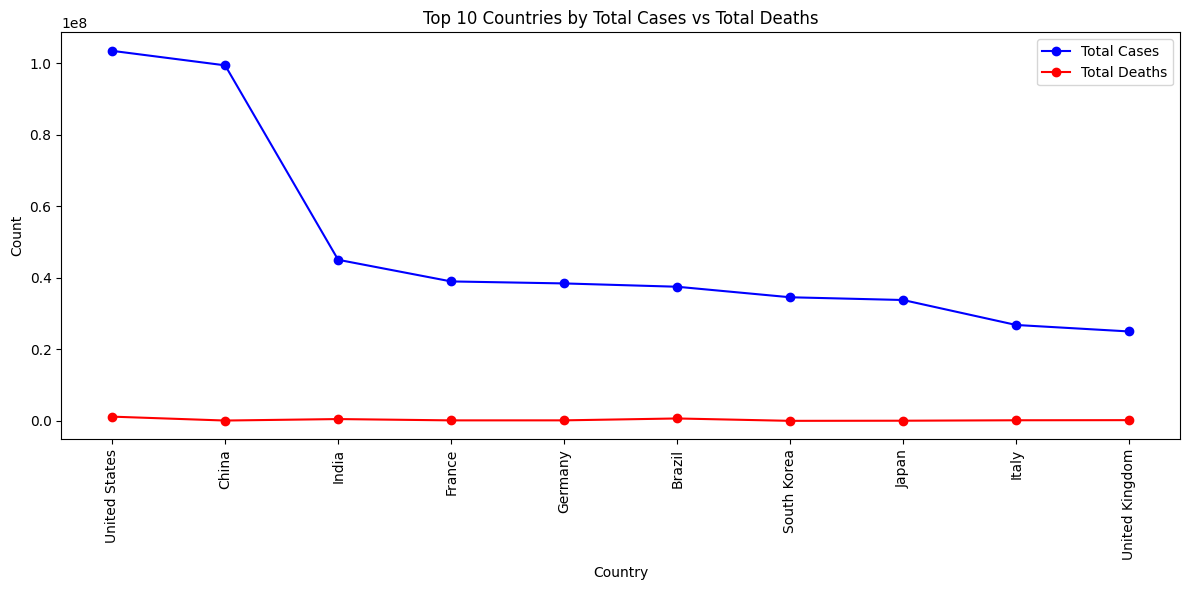

In [37]:
import matplotlib.pyplot as plt

# Get top 10 countries based on total cases
top_10_countries = Covid_Vaccination_Population.nlargest(10, 'Total_cases')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot total cases and total deaths
plt.plot(top_10_countries['country'], top_10_countries['Total_cases'], label='Total Cases', marker='o', color='blue')
plt.plot(top_10_countries['country'], top_10_countries['Total_deaths'], label='Total Deaths', marker='o', color='red')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Total Cases vs Total Deaths')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Interpretation: The line chart displays a comparison between the total cases and total deaths for the top 10 countries. The United States has the highest number of total cases, significantly outpacing other countries, while its total deaths are relatively low compared to the cases. Most of the other countries, including China, India, and Brazil, show a low number of deaths, indicating that the number of deaths does not increase proportionally with the cases in these countries. This suggests that the severity and impact of COVID-19 may vary by country, influenced by various factors like healthcare systems and vaccination rates.

**Data visualization 5: Life Expectancy vs COVID-19 Total Cases and Deaths**

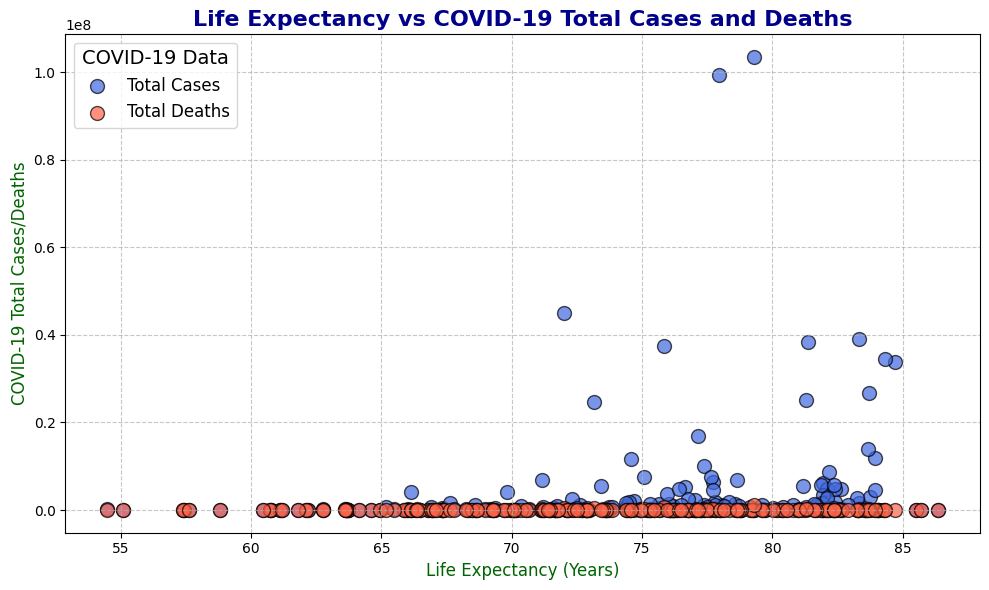

In [38]:
# Create a scatter plot for Total Cases and Total Deaths with better aesthetics
plt.figure(figsize=(10, 6))

# Plot Total Cases in blue
plt.scatter(All_data['Life expectancy (Years)'], All_data['Total_cases'], color='royalblue',
            label='Total Cases', alpha=0.7, edgecolors='black', s=100)

# Plot Total Deaths in red
plt.scatter(All_data['Life expectancy (Years)'], All_data['Total_deaths'], color='tomato',
            label='Total Deaths', alpha=0.7, edgecolors='black', s=100)

# Set the title and labels with improved styling
plt.title('Life Expectancy vs COVID-19 Total Cases and Deaths', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Life Expectancy (Years)', fontsize=12, color='darkgreen')
plt.ylabel('COVID-19 Total Cases/Deaths', fontsize=12, color='darkgreen')

plt.legend(fontsize=12, title="COVID-19 Data", title_fontsize=14, loc='upper left')

# Set gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Interpretation: The scatter plot above shows the relationship between life expectancy and COVID-19 total cases and total deaths for different countries. From the plot, it appears that countries with a higher life expectancy (around 75-85 years) generally report higher total cases and deaths, particularly for a few countries like the United States. However, there is no clear linear correlation between life expectancy and the number of COVID-19 cases or deaths. The plot also suggests that countries with lower life expectancy have relatively low COVID-19 cases and deaths, especially in the red (deaths) category.

**Conclusion**
---

* This project provided an in-depth analysis of global health data, focusing on the COVID-19 pandemic, vaccination efforts, and related population metrics. By merging datasets from various sources, performing data cleaning, and conducting exploratory data analysis (EDA), I was able to extract meaningful insights. The visualizations and pivot tables created helped in comparing COVID-19 cases, deaths, vaccinations, and other population factors like life expectancy across different countries.

* The findings of this analysis have the potential to guide decision-makers, policymakers, and health organizations in better understanding the impact of COVID-19 on different regions. Insights from this project could be beneficial for shaping vaccine distribution strategies, understanding the correlation between life expectancy and pandemic outcomes, and prioritizing resources based on population health data. In essence, this project highlights the significance of data-driven decision-making in global health management, contributing valuable insights to the fight against the pandemic and future health challenges.